<html>
    <body>
        <p style="font-size:30px;text-align:center;"><b>Practical 3</b></p>
        <p style="font-size:20px;text-align:center;">Name: KHARE PRATYUSH</p>
        <p style="font-size:20px;text-align:center;">Roll-No: 20BCE519</p>
        <p style="font-size:20px;text-align:center;">Course Name: Machine Learning (2CS501)</p>
    </body>
</html>
    

<p style="font-size: 1.2em"><b>Gradient Descent Approach</b></p>

In [2]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

X_train_temp1=X[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))

X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)
y_train=y[0:400]


X_test_temp1=X[400:506,:]

X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)
y_test=y[400:506]

scaler=StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:]=scaler.transform(X_train[:,1:])
X_test[:,1:]=scaler.transform(X_test[:,1:])

(506, 13)
(506,)
Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 14)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 14)


[0.71629351 0.15703277 0.51492865 0.01125419 0.32698193 0.25039731
 0.5735608  0.69371162 0.40233162 0.42288782 0.84334081 0.41365616
 0.94790302 0.8883348 ] 

Alpha =0.001	Theta=[22.92641166 -1.37255586  0.94869247 -0.97416092  1.0627574  -0.28287734
  4.83799435 -0.13063382 -0.72067263  0.27184956  0.19923912 -0.76650447
  0.74427337  0.23659984]

Alpha =0.002	Theta=[24.2538694  -1.41682008  0.75496754 -0.74309274  0.88083608 -0.42855921
  5.50982729 -0.52462789 -1.42925142  0.61464202  0.09644421 -1.127789
  0.53069548 -0.09785732]

Alpha =0.003	Theta=[ 2.43300706e+01 -1.44568482e+00  6.92564388e-01 -5.78302288e-01
  7.62398350e-01 -6.62496170e-01  5.53143954e+00 -7.91734510e-01
 -1.84416078e+00  9.04661527e-01 -5.73444392e-03 -1.31293582e+00
  3.70515517e-01 -3.58559678e-01]

Alpha =0.004	Theta=[24.33426684 -1.46363325  0.68569482 -0.46595475  0.70669962 -0.88347998
  5.41430004 -0.93011547 -2.13317271  1.14709331 -0.11730426 -1.43206082
  0.25212815 -0.58317013]

Alpha =0.005	Thet

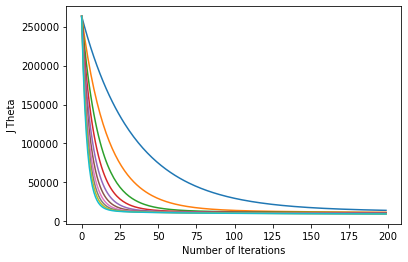

In [3]:
import matplotlib.pyplot as plt

theta=np.random.uniform(0,1,size=(X_train.shape[1]))
theta_values=theta.copy()

print(theta,"\n")

alpha=np.arange(0.001,0.0105,0.001)
niterations=200
m=X_train.shape[0]
n=X_train.shape[1]


j_theta=np.zeros((alpha.size,niterations))

plt.xlabel("Number of Iterations")
plt.ylabel("J Theta")

for k in range(alpha.size):
    theta=theta_values
    for i in range(niterations):
        update=np.zeros(X_train.shape[1])
        ypred=np.dot(X_train,theta)
        error=ypred-y_train
        j_theta[k][i]=np.sum(np.square(ypred - y_train))
        for j in range(n):
            update[j]=np.sum(error*(X_train.T)[j])
            theta=theta-(1/m)*(alpha[k])*update
        
    print("Alpha =",alpha[k],"\tTheta=",theta,"\n",sep="")
    plt.plot(range(niterations), j_theta[k])

    
predictions=np.dot(X_test,theta)
print("Mean Absolute Error:",metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("Mean Squared Error:",metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

plt.show()

<p style="font-size: 1.2em"><b> Normal Equation Approach </b></p>

In [4]:
import pandas as pd

filename = r'train.csv'
data_set  = pd.read_csv(filename) 

y=np.array(data_set['y']) 
x=np.ones([699,2])
x[:,1]=np.array(data_set['x'])
x

array([[ 1., 24.],
       [ 1., 50.],
       [ 1., 15.],
       ...,
       [ 1., 82.],
       [ 1., 66.],
       [ 1., 97.]])

In [5]:
X_Tranpose=np.dot(x.T,x)

inverse=np.linalg.inv(X_Tranpose) 

X_Transpose_Y=np.dot(x.T,y)

theta=np.dot(inverse,X_Transpose_Y)

print(theta)

[-0.10726546  1.00065638]


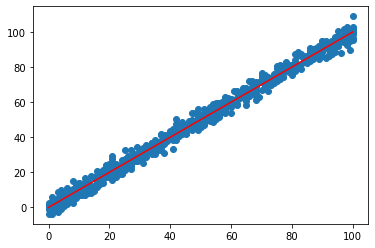

MAE 2.227151953645557
MSE 7.867752733487687


In [10]:
ypred=np.dot(theta,x.T)
plt.scatter(x[:,1], np.array(data_set["y"])) 
plt.plot([min(x[:,1]), max(x[:,1])], [min(ypred), max(ypred)], color='red')  # regression line
plt.show()
print("MAE",metrics.mean_absolute_error(y_true=y,y_pred=ypred))
print("MSE",metrics.mean_squared_error(y_true=y,y_pred=ypred))